# Contents: 

1.  Importing libraries and data
2.  Data exploration
3.  Charts\
  a. Bar chart - days of week \
  b. Histogram - Hour of day \
  c. Barh - Customer loyalty distribution
 
4. Sampling using seed - Difference in expenditure 
5. Customer Exploration
6.  Export

 ### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/biancaskyehoney/Documents/Instacart Basket Analysis '

In [3]:
# Specify the correct file path and name
pickle_file_path = os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl')

# Read the Pickle file using pd.read_pickle()
df_ords_prods_cust = pd.read_pickle(pickle_file_path)

### 2. Data exploration

In [4]:
df_ords_prods_cust.shape

(32404859, 37)

In [5]:
df_ords_prods_cust.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,1,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Text(0, 0.5, 'Number of Orders')

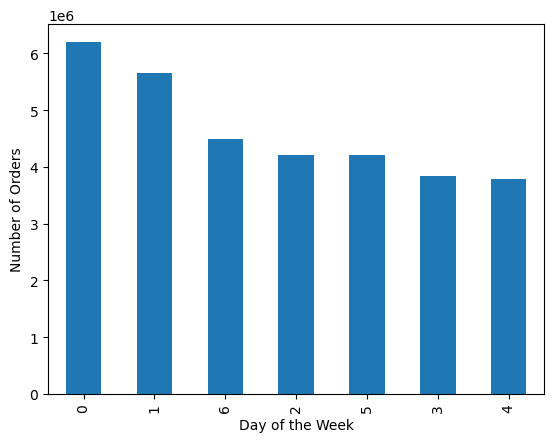

In [6]:
# Create a bar chart 

orders_day_of_week_bar = df_ords_prods_cust['orders_day_of_week'].value_counts().plot.bar()
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")

In [7]:
#export the visualization 
orders_day_of_week_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'orders_day_of_week_bar.png'))

Text(0.5, 0, 'Order Hour Of Day')

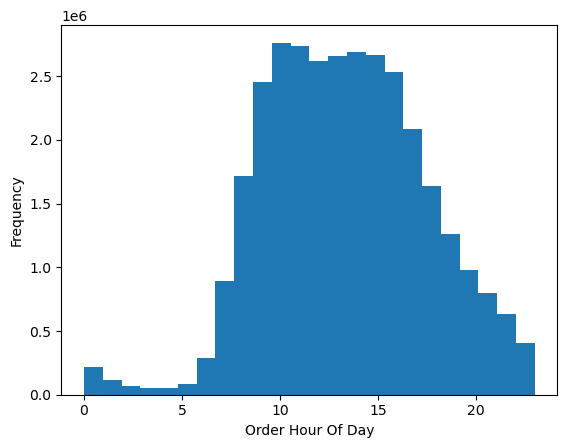

In [8]:
# Create a Histogram 


hist = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)
plt.xlabel("Order Hour Of Day")

# 
Above we can see that the popular order hours of the day - 9am being the highest, with a large drop down from 4 pm onwards.

# Distribution across customer loyalty 

In [9]:
# Group by loyalty_flag and count the number of users in each category

loyalty_counts = df_ords_prods_cust['frequency_flag'].value_counts()

Text(0.5, 1.0, 'Distribution of Orders by Loyalty')

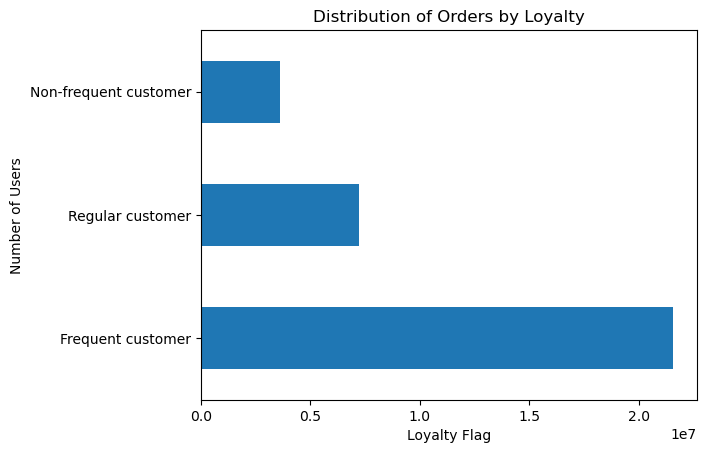

In [10]:
# Create a bar chart
bar = loyalty_counts.plot(kind='barh')

# Add labels and a title
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Users')
plt.title('Distribution of Orders by Loyalty')


In [11]:
#export the visualization 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_counts.png'))

# Check differences in expenditure

In [12]:
# Create Sampling data

np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [13]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [14]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [ ]:
# Use list to split dataframe into 2 samples

big = df_ords_prods_cust[dev]
small = df_ords_prods_cust[~dev]

In [ ]:
# test

len(df_ords_prods_cust)

In [ ]:
# test sample dfs 

len(big) + len(small)

In [ ]:
#Create a subset only containing columns 'prices' and 'order hour of day'
df = small[['prices', 'order_hour_of_day']]

In [ ]:
#create a line graph
line_price_hour = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

In [ ]:
#export the visualization 
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_price_hour.png'))

# Customer exploration

In [ ]:
#create bar chart to find the distribution of marital status

marital_status = df_ords_prods_cust['fam_status'].value_counts().plot.bar()
plt.xlabel("Number of Users")
plt.ylabel("Loyalty")  
plt.title("Number of Users by Marital Status")

In [ ]:
#export the vis
marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'marital_status.png'), bbox_inches='tight')

In [ ]:
# Create a subset for n_dependants & Age

df = small[['n_dependants', 'age']]

In [ ]:
line_dependants_age = sns.lineplot(data = df, x = 'age',y = 'n_dependants')

In [ ]:
#export the vis
line_dependants_age.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_dependants_age.png'), bbox_inches='tight')

#

No real correlation between number of dependants and age

In [ ]:
# Scatterplot of age comparison to income


age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_cust)

#

From age 40 onwards there is a real jump in terms of the income ceiling experienced in years prior (400000)

In [ ]:
#export the vis
age_income_scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_income_scatterplot.png'))